In [191]:
# importing the libraries
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Business Understanding
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.
I'm going to perform some exploration on Black Friday Dataset From Kaggle. The task or questions I will target for as below:

1. Which are the 3 most watched types in Anime.
2. which is the most watched anime.
3. If the anime is popular will more people rate it ?


# Data understanding

In [192]:
# read the data set 
Anime_data_df=pd.read_csv('anime.csv')
Anime_data_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [193]:
Anime_ratings_df=pd.read_csv('rating.csv')
Anime_ratings_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [194]:
# get the basic info of data set
Anime_data_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [195]:
Anime_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [196]:
# to print the number of columns  and rows in the data set.
num_rows = Anime_data_df.shape[0] #Provide the number of rows    in the dataset
num_cols = Anime_data_df.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 12294
Column number: 7


In [197]:
# to check the columns in the data set
Anime_data_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

# Preparing the data
Some data preparation steps need to be done before using the dataset for exploration, including：

1.Checking columns with missing values and analyze impact.

2.Dealing with missing values.

3.One-Hot Encoding for Categorical variables such as name,genre,type,episodes.

In [198]:
# merging the two data frames
Anime_data_df=pd.merge(Anime_ratings_df,Anime_data_df.drop('rating',axis=1),on='anime_id')
Anime_data_df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [213]:
# to  convert the data type of episodes to int
Anime_data_df=Anime_data_df[Anime_data_df["episodes"]!='Unknown']
Anime_data_df['episodes']=Anime_data_df['episodes'].astype('int64')

In [200]:
# Data Preparation Step 1: check how many missing values are in the dataset
Anime_data_df.isnull().sum()

user_id       0
anime_id      0
rating        0
name          0
genre       110
type          4
episodes      0
members       0
dtype: int64

In [201]:
# To fill the Missing values in  type column with TV as the type as mojority of the anime belong to this type ,and verfy few belong to OVAs and movies.
Anime_data_df['type'].fillna('TV',inplace=True)


In [202]:
# To fill the Missing values in  'Genre' column with 'NA' as guesing doesnt work as genre is a unique for the anime 
Anime_data_df['genre'].fillna('NA',inplace=True)
Anime_data_df.isnull().sum()

user_id     0
anime_id    0
rating      0
name        0
genre       0
type        0
episodes    0
members     0
dtype: int64

In [203]:
# Data Preparation Step 3: One-Hot Encoding for Categorical variables
# One-hot encode the feature:  'genre', 'type'
le = LabelEncoder()
Anime_data_df['Genre_onehot_encode']              = le.fit_transform(Anime_data_df['genre'].astype(str))
Anime_data_df['type_onehot_encode']              = le.fit_transform(Anime_data_df['type'].astype(str))

In [204]:
Anime_data_df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members,Genre_onehot_encode,type_onehot_encode
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,555,5
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,555,5
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,555,5
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,555,5
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,555,5


In [205]:
Anime_data_df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Shiroi Zou                                                          10.000000
Choegang Top Plate                                                  10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Doukyuusei                                                           9.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Shiranpuri                                                           9.000000
Tang Lang Bu Chan                                                    9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

Hmmm... seems something's not right here. maybe that animes with 10 rating only got a few users watched them so the rating goes up so high.

so, we need another attribute in order to get better recommendation. number of users seems logical since the more users watched the anime, higher probability the anime gets the actual rating based on many users.

let's check it out

# Question 
data wrangling for most watched anime of the year 2017

In [206]:
# to check the names of anime with maximum number of users to find the most watched anime
episode_count =Anime_data_df[Anime_data_df["rating"]>0].groupby(["name"])["members"].count().sort_values(ascending=False)
print(episode_count.head(10))


name
Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: members, dtype: int64


# Answer
Now we  can see some popular anime here, like Shingeki No Kyojin, Naruto, and even Fullmetal Alchemist (i have watched them , except for  Code Geass and Elfen Lied, maybe they are worth the try.
We can conclude 'Death note' and 'Sword art online' to be the most popular anime of the year.

# Question 2
To Find the 3 Most watched types in Anime .

type
Movie      7.922243
TV         7.899161
Special    7.463639
OVA        7.334584
ONA        7.229122
Music      7.214282
Name: rating, dtype: float64


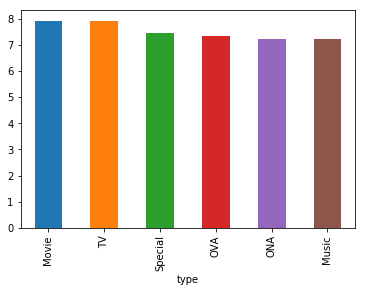

In [207]:
# To find the most watched types of anime.
type_rating = Anime_data_df[Anime_data_df["rating"]>0].groupby(["type"])["rating"].mean().sort_values(ascending=False)
print(type_rating)
type_rating.plot.bar(x='type')

# Answer 2
As we can see in the graph above the most watched 3 types of Anime are 1.Movie 2.Tv 3.Special.
Many users watch the OVA ONA and musical too but yes not as much as compared to the first three.
Mostly the Anime story starts with the TV type ,a few of them starts with a movie in the beginning.

# Question 3
If the anime is popular will more people rate it ?
# Answer
Yes but the data is very noisy


In [208]:
ratings = pd.DataFrame(Anime_data_df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(Anime_data_df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=Anime_data_df[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [209]:
# Proof for the Answer  to the question
#Is the relationship expoential ? Well compared to linear exp seems to work better
ratings.head()



,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


(0, 3000)

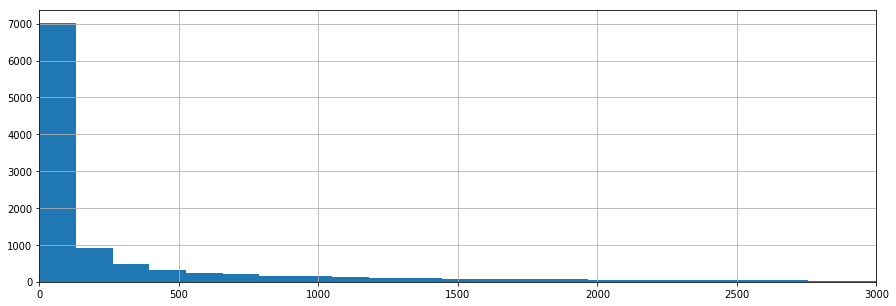

In [210]:
plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)

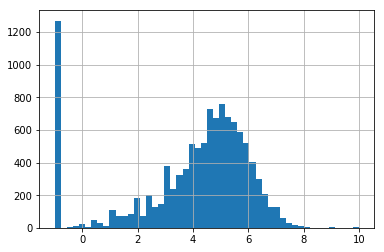

In [211]:
ratings['rating'].hist(bins=50)

C:\Users\hp-pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp-pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


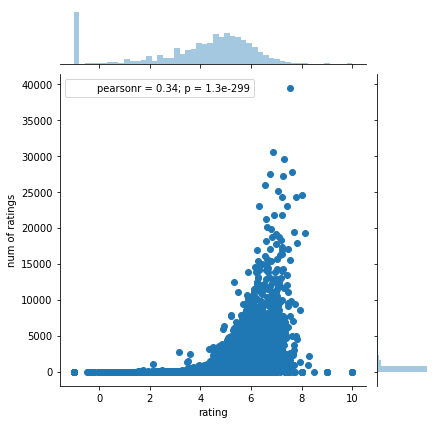

In [212]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

*The above scatter plot shows that the relation is exponential  as the number of people who rated increases the rating aslo increases respectively.